<a href="https://colab.research.google.com/github/filipabramowicz/ML_AI_course/blob/main/notes_from_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Imports needed later:

In [ ]:
#@title Everyday life's import

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Nice printing
import pprint

# Data processing
import numpy as np
import pandas as pd

# Data transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import log

# Data preparation for learning, model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms

# Linear regression
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso

# Processing pipelining
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Quality indicators
from sklearn import metrics

Let's load some data:

In [ ]:
#@title Simple data acquisition for regression
#@markdown * Data on mammals: a popular example for regression.
#@markdown * Example based on: Jesus Rogel-Salazar, *Data Science and Analysis with Python*, CRC Press, Boca Raton 2017. **Chapter 4**

mammals = pd.read_csv("https://ndownloader.figshare.com/files/2332069")

mammals

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [ ]:
#@markdown Basic information on data

print(f'Columns: {mammals.columns}')
print(f'Dimensions: {mammals.shape}')
print(f'Number of rows: {len(mammals)}') # or: mammals.shape[0]
print(f'Number of elements: {mammals.size}')

Columns: Index(['Mammal', 'body', 'brain'], dtype='object')
Dimensions: (62, 3)
Number of rows: 62
Number of elements: 186


In [ ]:
#@markdown A few random samples (approx. 10%)

print('The last three rows:',mammals.iloc[-3:,:])

print('\nSome random elements:')
mammals.sample(19)

The last three rows:         Mammal   body  brain
59   Phalanger  1.620   11.4
60  Tree shrew  0.104    2.5
61     Red fox  4.235   50.4

Some random elements:


,Mammal,body,brain
27,Giraffe,529.000,680.00
0,Arctic fox,3.385,44.50
54,Musk shrew,0.048,0.33
35,Kangaroo,35.000,56.00
47,Desert hedgehog,0.550,2.40
2,Mountain beaver,1.350,8.10
24,Cat,3.300,25.60
50,Raccoon,4.288,39.20
18,Asian elephant,2547.000,4603.00
52,E. American mole,0.075,1.20


# Exercise number 1

For the `mammals` data perform as much data review and pre-processing as possible:
1. Show the distibution of data.
2. Plot variables (histograms for both attributes; and for single attributes), violin plots, provide a pair plot, find correlations.
3. Perform basic statistical analysis: how many samples? what are the means, standard deviations, min, max, quartile values?
4. Can we see outliers? At least a box plot can be helpful. BTW. do we really have outliers here? When you cut 'outliers' how other plots look like?
5. Any missing or correctable data?
6. Feature selection, extraction?
7. Transformation of data: maxmin or z-score scaler would be helpful. How does it influence correlations?

In [ ]:
#@title SOLUTION Exercise no. 1

print('Basic statistical description:\n', mammals.describe())
# mammals_cut = mammals.drop(mammals[(mammals['body'] >= 48) & (mammals['brain'] >= 166)].index)
mammals_cut = mammals.drop(mammals[(mammals['body'] >= 48) | (mammals['brain'] >= 166)].index)
# print(mammals_cut)
print(mammals_cut.describe())

Basic statistical description:
               body        brain
count    62.000000    62.000000
mean    198.789984   283.134194
std     899.158011   930.278942
min       0.005000     0.140000
25%       0.600000     4.250000
50%       3.342500    17.250000
75%      48.202500   166.000000
max    6654.000000  5712.000000
            body       brain
count  44.000000   44.000000
mean    4.110659   21.836818
std     8.425899   32.605560
min     0.005000    0.140000
25%     0.180500    2.575000
50%     1.195000    7.350000
75%     3.500000   22.000000
max    36.330000  119.500000


<Figure size 432x288 with 0 Axes>

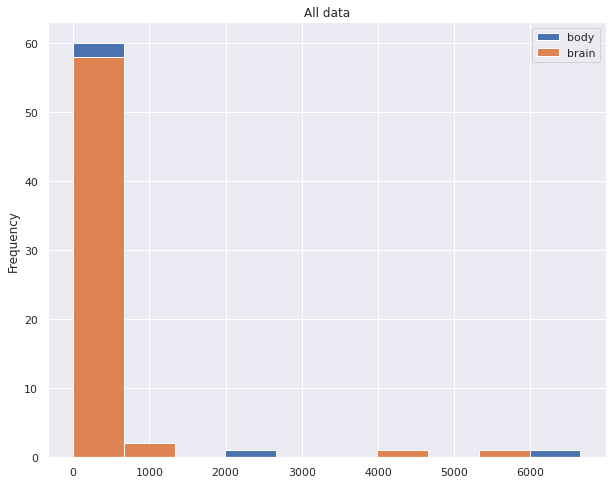

In [ ]:
labels_mammals = ['body', 'brain']

# Histogram for both attributes: all data
plt.figure()
mammals[['body', 'brain']].plot.hist(bins=10, alpha=1, figsize=(10, 8))
plt.title('All data')
plt.show()


<Figure size 432x288 with 0 Axes>

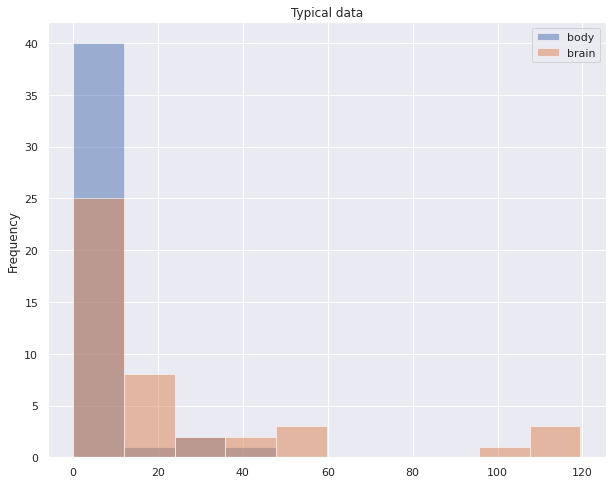

In [ ]:
# Histogram for both attributes: `typical` data
plt.figure()
mammals_cut[['body', 'brain']].plot.hist(bins=10, alpha=0.5, figsize=(10, 8))
plt.title('Typical data')
plt.show()


<Figure size 432x288 with 0 Axes>

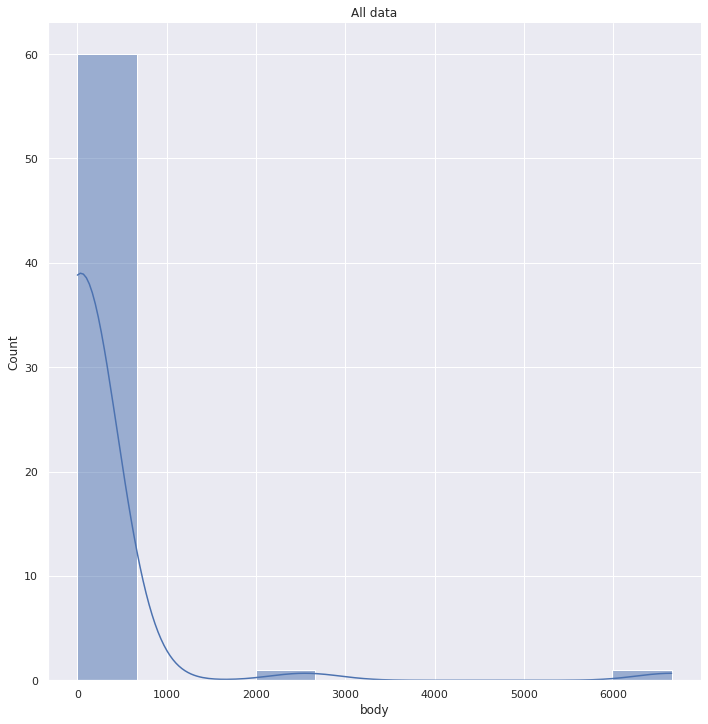

In [ ]:
# Histogram for body with KDE: all data
plt.figure()
sns.displot(data=mammals[['body']], x="body", bins=10, kde=True, height=10, aspect=1.0)
plt.title('All data')
plt.show()

<Figure size 432x288 with 0 Axes>

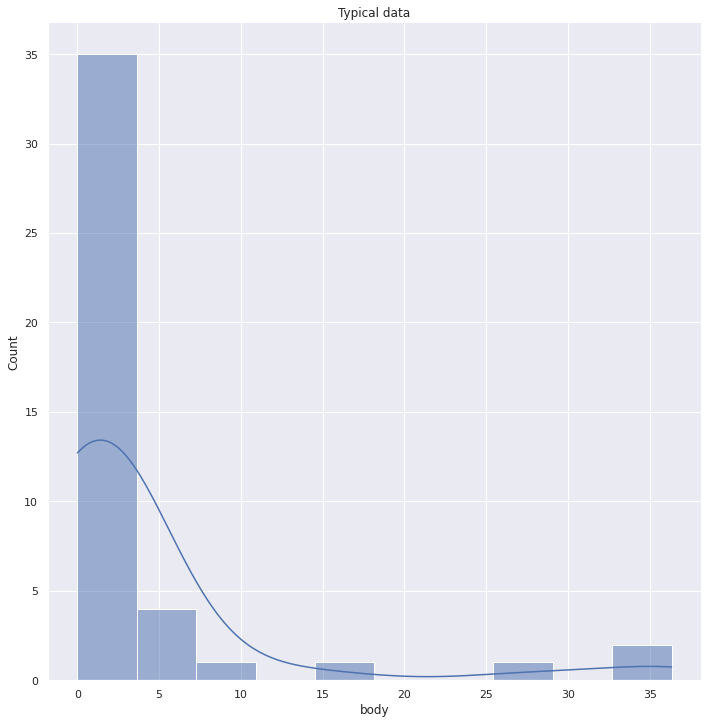

In [ ]:
# Histogram for body with KDE: `typical' data
plt.figure()
sns.displot(data=mammals_cut[['body']], x="body", bins=10, kde=True, height=10, aspect=1.0)
plt.title('Typical data')
plt.show()

<Figure size 432x288 with 0 Axes>

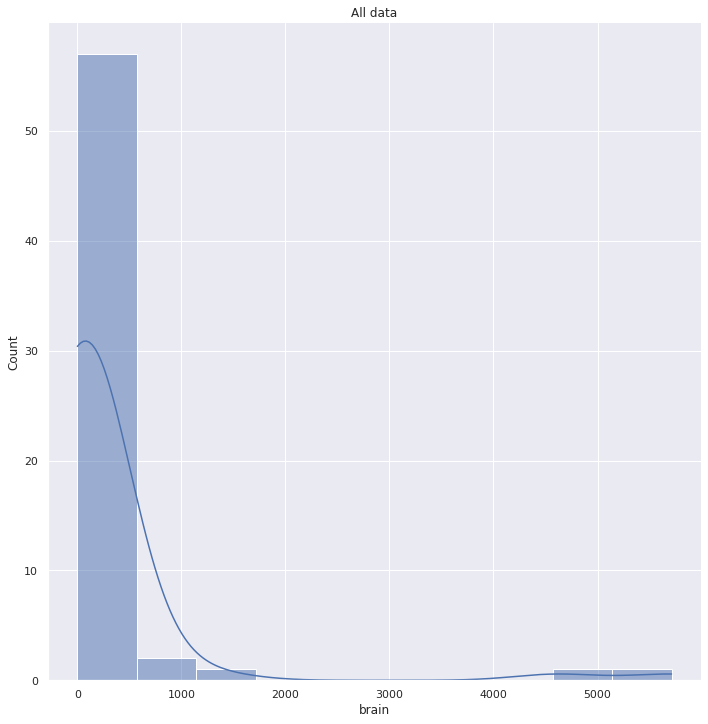

In [ ]:
# Histogram for brain with KDE: all data
plt.figure()
sns.displot(data=mammals[['brain']], x="brain", bins=10, kde=True, height=10, aspect=1.0)
plt.title('All data')
plt.show()

<Figure size 432x288 with 0 Axes>

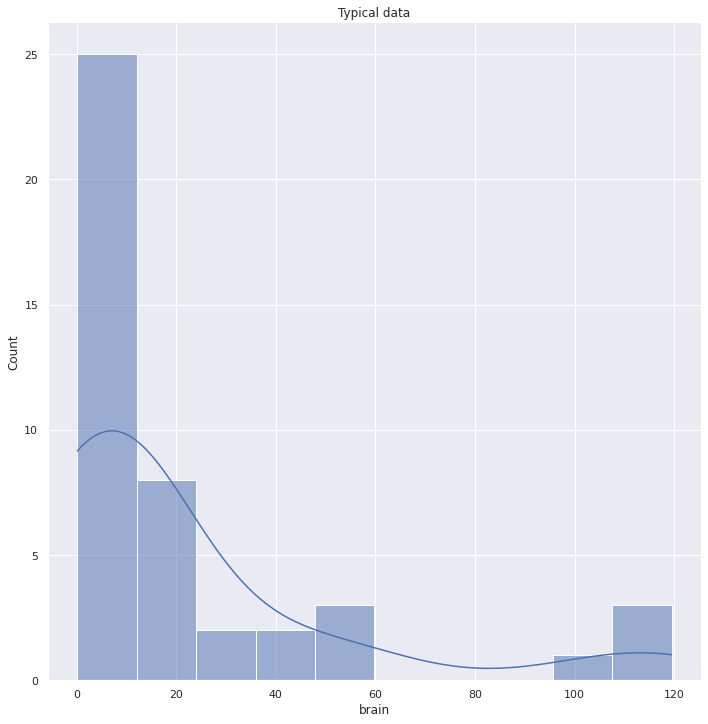

In [ ]:
# Histogram for brain with KDE: `typical' data
plt.figure()
sns.displot(data=mammals_cut[['brain']], x="brain", bins=10, kde=True, height=10, aspect=1.0)
plt.title('Typical data')
plt.show()

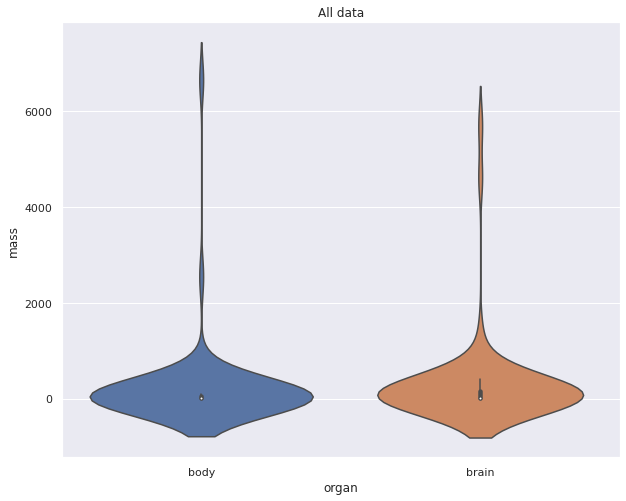

In [ ]:
# Violin plot: all data
combined_data = mammals[['body', 'brain']].melt(var_name='organ', value_name='mass')
plt.figure(figsize=(10, 8))
sns.violinplot(x='organ', y='mass', data=combined_data)
# plt.xlabel('')
plt.ylabel('mass')
plt.title('All data')
plt.show()

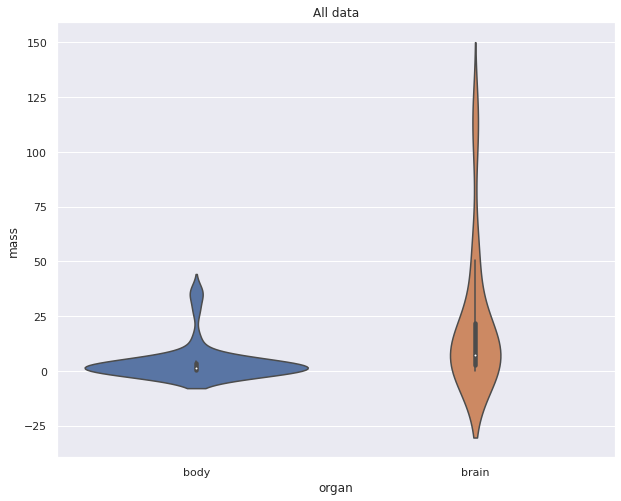

In [ ]:
# Violin plot: `typical` data
combined_data_cut = mammals_cut[['body', 'brain']].melt(var_name='organ', value_name='mass')
plt.figure(figsize=(10, 8))
sns.violinplot(x='organ', y='mass', data=combined_data_cut)
# plt.xlabel('')
plt.ylabel('mass')
plt.title('All data')
plt.show()

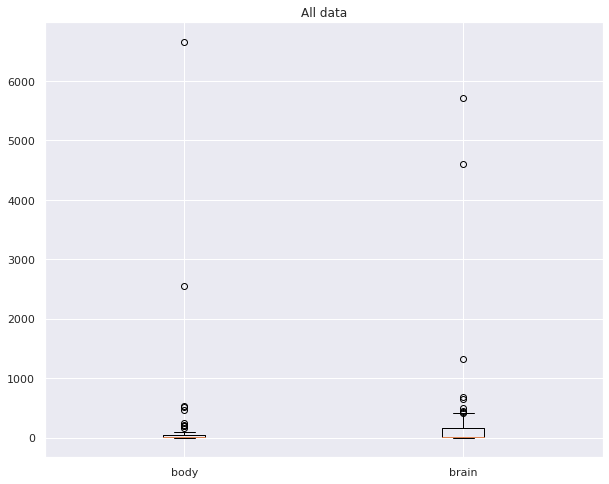

In [ ]:
# Box plot: all data
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_array = mammals[labels_mammals].to_numpy()
plt.boxplot(mammals_array)
ax.set_xticklabels(labels_mammals)
plt.title('All data')
plt.show()

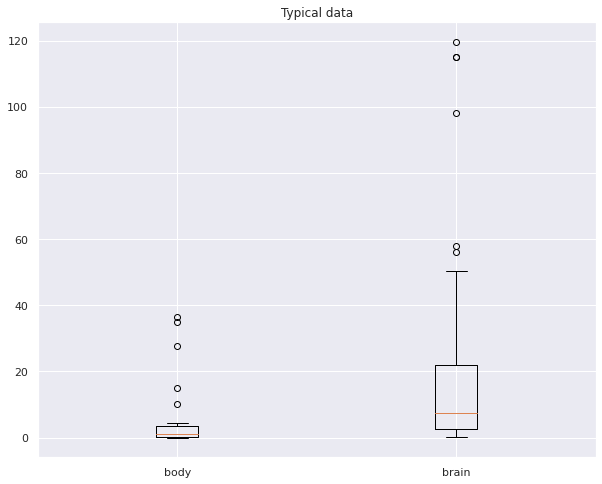

In [ ]:
# Box plot: `typical` data
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_array_cut = mammals_cut[labels_mammals].to_numpy()
plt.boxplot(mammals_array_cut)
ax.set_xticklabels(labels_mammals)
plt.title('Typical data')
plt.show()

In [ ]:
# Max-min scaling
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
mammals_mm = pd.DataFrame(scaler_mm.fit_transform(
    mammals[labels_mammals]),
    columns=labels_mammals
    )

print(mammals_mm.groupby(lambda idx: 0).agg(['min','mean','max','std']))

  body                          brain                         
   min      mean  max       std   min      mean  max       std
0  0.0  0.029875  1.0  0.135131   0.0  0.049545  1.0  0.162868


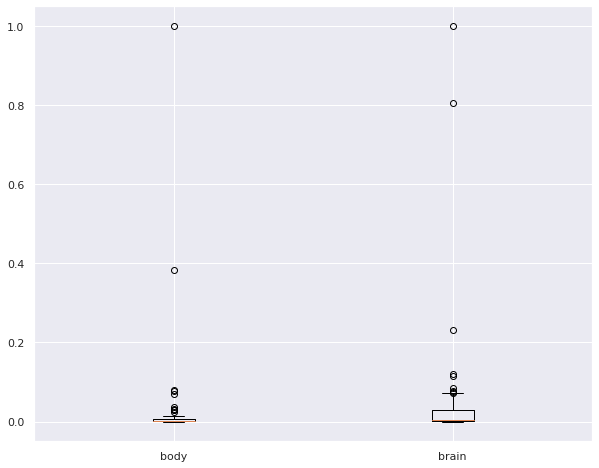

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_mm = mammals_mm[labels_mammals].to_numpy()
plt.boxplot(mammals_mm)
ax.set_xticklabels(labels_mammals);
plt.show()

In [ ]:
# z-Score scaling
from sklearn.preprocessing import StandardScaler

scaler_z = StandardScaler()
mammals_z = pd.DataFrame(scaler_z.fit_transform(
    mammals[labels_mammals]),
    columns=labels_mammals
    )

print(mammals_z.groupby(lambda idx: 0).agg(['min','mean','max','std']))

       body                                       brain                \
        min          mean       max       std       min          mean   
0 -0.222884 -1.029642e-17  7.237778  1.008163 -0.306687 -4.297638e-17   

                       
        max       std  
0  5.883379  1.008163  


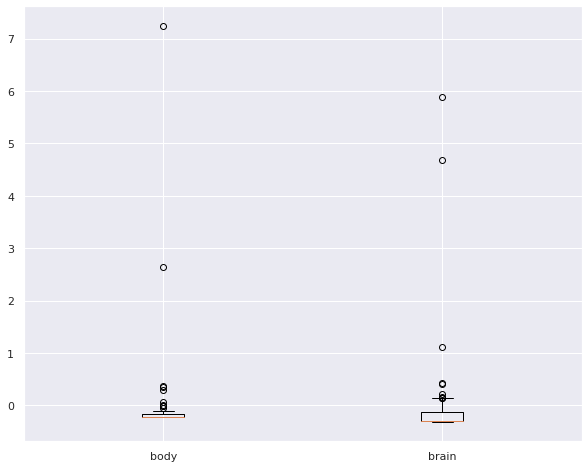

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.axes()
mammals_z = mammals_z[labels_mammals].to_numpy()
plt.boxplot(mammals_z)
ax.set_xticklabels(labels_mammals);
plt.show()

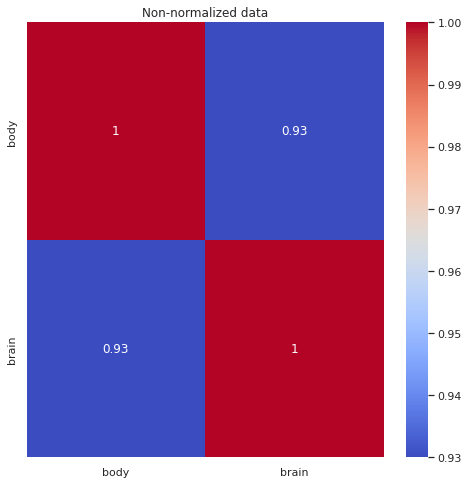

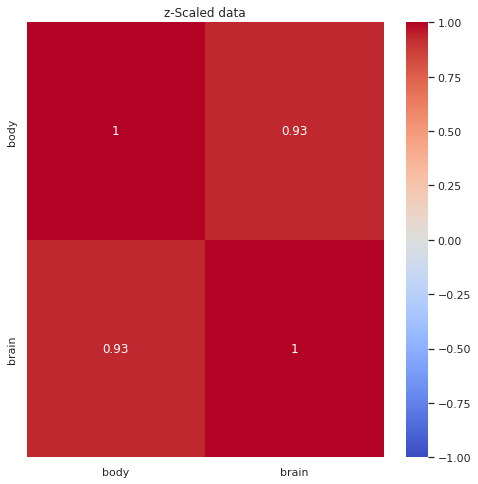

In [ ]:
# Heatmap of collelations: all data = typical data
plt.figure(figsize=(8, 8))
correlation_matrix = mammals.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Non-normalized data")
plt.show()
plt.figure(figsize=(8, 8))
correlation_matrix = np.corrcoef(mammals_z.T)
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', xticklabels=labels_mammals,yticklabels=labels_mammals)
plt.title("z-Scaled data")
plt.show()

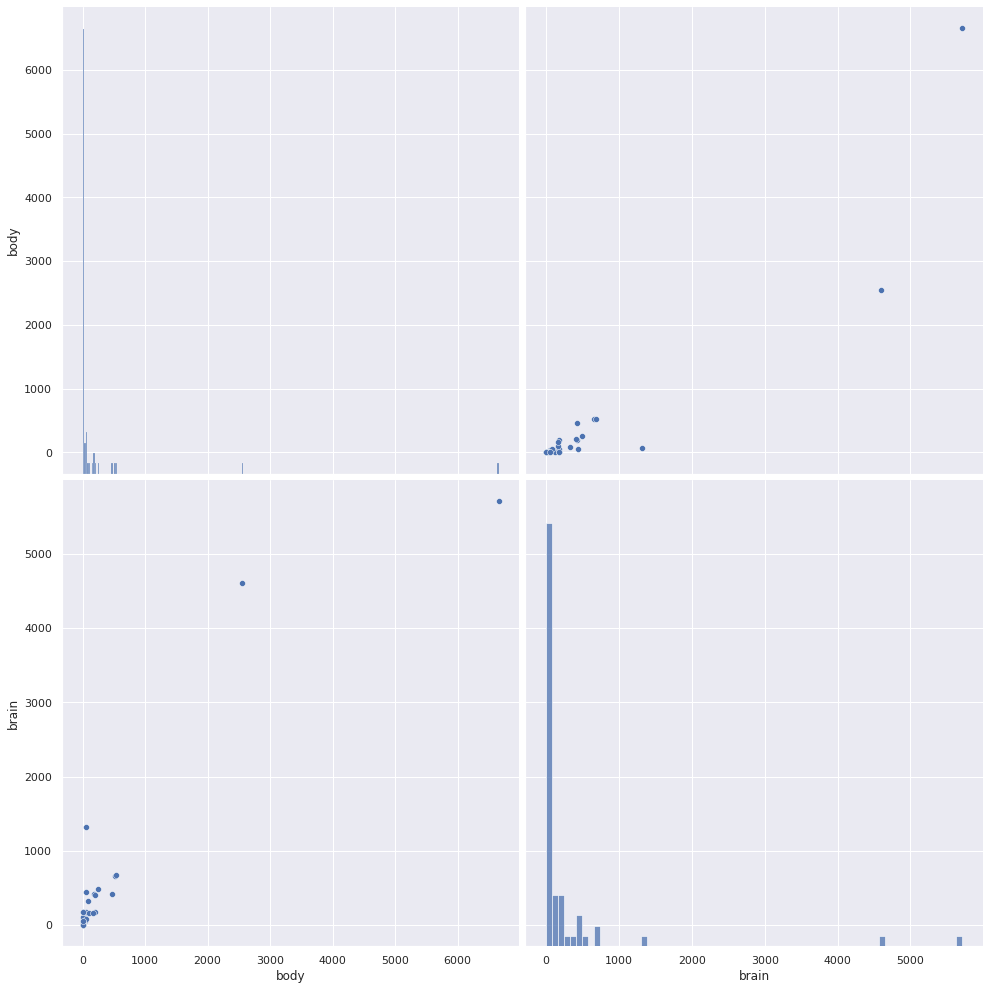

In [ ]:
# Pair plots
# sns.pairplot(iris, hue='Mammal')
sns.pairplot(mammals,height=7, aspect=1.0)
# plt.show()

# Machine learning models

In [ ]:
#@markdown Let us retrieve the basic two columns

body_data = mammals[['body']] # this is a dataframe
# body_data = mammals['body'] # this is a series of data, be watchful about that!

print(body_data)
print(body_data.shape)

brain_data = mammals[['brain']]
print(brain_data)
print(brain_data.shape)

       body
0     3.385
1     0.480
2     1.350
3   465.000
4    36.330
..      ...
57  160.000
58    0.900
59    1.620
60    0.104
61    4.235

[62 rows x 1 columns]
(62, 1)
    brain
0    44.5
1    15.5
2     8.1
3   423.0
4   119.5
..    ...
57  169.0
58    2.6
59   11.4
60    2.5
61   50.4

[62 rows x 1 columns]
(62, 1)


In [ ]:
print(body_data)

       body
0     3.385
1     0.480
2     1.350
3   465.000
4    36.330
..      ...
57  160.000
58    0.900
59    1.620
60    0.104
61    4.235

[62 rows x 1 columns]


In [ ]:
print(brain_data)

    brain
0    44.5
1    15.5
2     8.1
3   423.0
4   119.5
..    ...
57  169.0
58    2.6
59   11.4
60    2.5
61   50.4

[62 rows x 1 columns]


Let's look on relationship between body mass and brain mass. Let's visualiza our data.

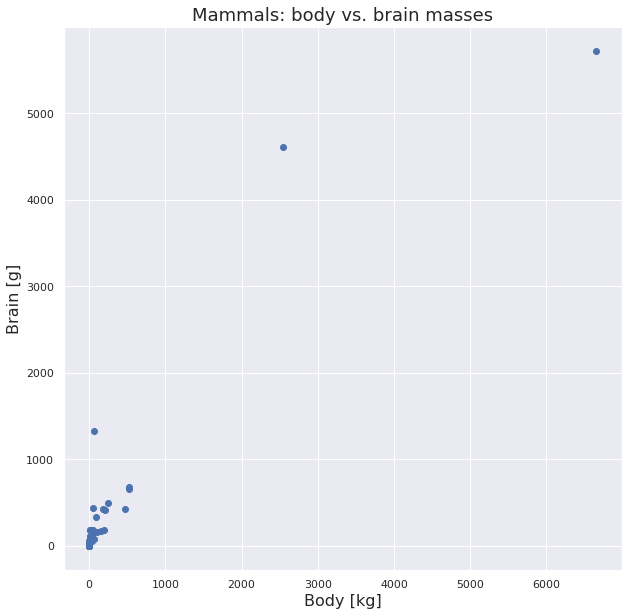

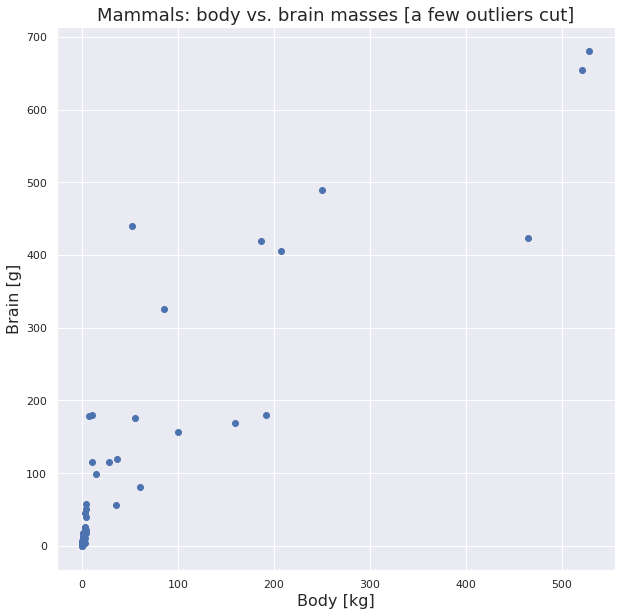

In [ ]:
#@title Visualization of the data

plt.figure(figsize=(10, 10))
plt.scatter(body_data,brain_data)

plt.xlabel("Body [kg]", fontsize=16)
plt.ylabel("Brain [g]", fontsize=16)
plt.title("Mammals: body vs. brain masses", fontsize=18)
plt.show()

mammals_sorted = mammals.sort_values(by='brain', ascending=True)
plt.figure(figsize=(10, 10))
plt.scatter(mammals_sorted['body'].iloc[:-3],mammals_sorted['brain'].iloc[:-3])
plt.xlabel("Body [kg]", fontsize=16)
plt.ylabel("Brain [g]", fontsize=16)
plt.title("Mammals: body vs. brain masses [a few outliers cut]", fontsize=18)
plt.show()

In [ ]:
#@markdown Additionally, we can look for the extreme values...

# print(mammals['body'].min())
print("\nAnimal with the smallest body: ", mammals.loc[mammals['body'].idxmin()])
print("\nAnimal with the smallest brain: ", mammals.loc[mammals['brain'].idxmin()])
print("\nAnimal with the heaviest body: ", mammals.loc[mammals['body'].idxmax()])
print("\nAnimal with the heaviest brain: ", mammals.loc[mammals['brain'].idxmax()])


Animal with the smallest body:  Mammal    Lesser short-tailed shrew
body                          0.005
brain                          0.14
Name: 13, dtype: object

Animal with the smallest brain:  Mammal    Lesser short-tailed shrew
body                          0.005
brain                          0.14
Name: 13, dtype: object

Animal with the heaviest body:  Mammal    African elephant
body                6654.0
brain               5712.0
Name: 32, dtype: object

Animal with the heaviest brain:  Mammal    African elephant
body                6654.0
brain               5712.0
Name: 32, dtype: object


There is a correlation between body weight and brain weight

In [ ]:
#@markdown On the other hand, this might be not always the case...

print('Mammal with median body: \n ', \
      mammals[(mammals['body'] <= mammals['body'].quantile(q=0.505)) \
              & (mammals['body'] >= mammals['body'].quantile(q=0.49))])
print('Mammal with median brain: \n ', \
      mammals[(mammals['brain'] <= mammals['brain'].quantile(q=0.505)) \
              & (mammals['brain'] >= mammals['brain'].quantile(q=0.49))])

Mammal with median body: 
     Mammal  body  brain
24    Cat   3.3   25.6
Mammal with median brain: 
                     Mammal  body  brain
36  Yellow-bellied marmot  4.05   17.0


# Exercise number 2

For the `mammals` data perform linear regression with `sklearn`:
1. Define the linear regression model `LinearRegression()`. We will need methods `.fit` and `.predict`. For description you can look at the [help website](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
2. Perform calculations three times in different ways:
  *   For the whole set of data (`sk_regr`). Try to find outliers on the basis of regression.
  *   For the set of data without outliers (`sk_regr_cut`). This operation might resemble work of a biologist, and not a machine learning specialist.
  *   Divide the whole set of data into two subsets: training and test set (`sk_regr_ml`). Predict the values for the samples in the test set on the basis of the regression found for the training set.
3. You can assume that `body_data` is our independent variables (input to the model), while `brain_data` is our dependent variables (predicted).
3. Fit the model to training data. As for time being do not transform the data.
4. Print the coefficient (`.coef_`) and intercept (`.intercept_`).
5. Visualize the results: plot the regression line on the data.

In [ ]:
#@title SOLUTION Exercise no. 2
#@markdown Regression with Scikit-learn: all the data

from sklearn import linear_model

# we call our linear regression model `sk_regr`
sk_regr = linear_model.LinearRegression()
sk_regr.fit(body_data,brain_data)
# body_data: independent variables
# brain_data: dependent variables

print(f'Coefficient = {sk_regr.coef_}')
print(f'Intercept = {sk_regr.intercept_}')

Coefficient = [[0.96649637]]
Intercept = [91.00439621]


In [ ]:
range1 = np.linspace(0,7000,10)
#print(range1)
new_body = range1[:,np.newaxis]
print(new_body)
#print(range1,new_body)

[[   0.        ]
 [ 777.77777778]
 [1555.55555556]
 [2333.33333333]
 [3111.11111111]
 [3888.88888889]
 [4666.66666667]
 [5444.44444444]
 [6222.22222222]
 [7000.        ]]


In [ ]:
brain_pred = sk_regr.predict(new_body)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


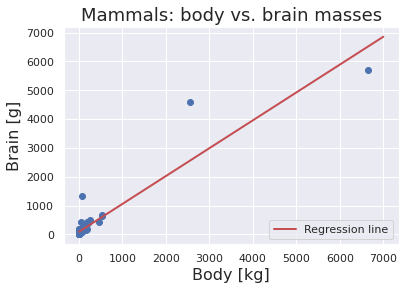

In [ ]:
plt.scatter(mammals['body'],mammals['brain'])
#plt.scatter(mammals['body'],mammals['brain'])
plt.xlabel("Body [kg]", fontsize=16)
plt.ylabel("Brain [g]", fontsize=16)
plt.title("Mammals: body vs. brain masses", fontsize=18)
plt.plot(new_body,brain_pred,'r',label="Regression line",linewidth=2)
plt.legend(loc=4)
plt.show()

          body    brain  sq_errors_lr_all
count    62.00    62.00             62.00
mean    198.79   283.13         108423.21
std     899.16   930.28         561820.48
min       0.00     0.14              7.49
25%       0.60     4.25           5451.17
50%       3.34    17.25           7257.88
75%      48.20   166.00           8171.36
max    6654.00  5712.00        4203850.47


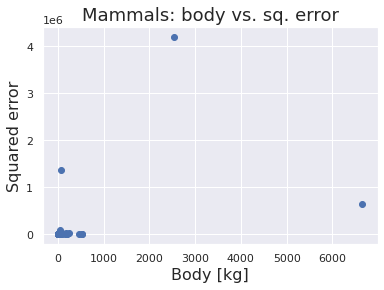

,Mammal,body,brain,sq_errors_lr_all
0,Arctic fox,3.385,44.5,2477.648823
1,Owl monkey,0.480,15.5,5771.184802
2,Mountain beaver,1.350,8.1,7091.183690
3,Cow,465.000,423.0,13788.679280
4,Grey wolf,36.330,119.5,43.787458
...,...,...,...,...
57,Brazilian tapir,160.000,169.0,5874.274383
58,Tenrec,0.900,2.6,7969.890452
59,Phalanger,1.620,11.4,6588.588433
60,Tree shrew,0.104,2.5,7850.830400


In [ ]:
x = body_data
y = brain_data
# reg = LinearRegression().fit(x.values.reshape(-1, 1), y)
# y_pred = reg.predict(x.values.reshape(-1, 1))
y_pred = sk_regr.predict(body_data)
sq_error = (y - y_pred)**2
mammals['sq_errors_lr_all'] = sq_error
print(mammals.describe().round(2))
plt.scatter(body_data,mammals['sq_errors_lr_all'])
plt.xlabel("Body [kg]", fontsize=16)
plt.ylabel("Squared error", fontsize=16)
plt.title("Mammals: body vs. sq. error", fontsize=18)
plt.show()
mammals

The basic method to check is to calculate $R^2$ [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination).

In [ ]:
#@markdown R square coefficient

print(f'R^2 = {sk_regr.score(body_data,brain_data)}')
#print(f"R^2 = {sk_regr_cut.score(mammals_cut[['body']],mammals_cut[['brain']])} without outliers, R^2 for the set without outliers")
#print(f'R^2 = {sk_regr_cut.score(body_data,brain_data)} without outliers, R^2 for the whole set')
#print(f'R^2 = {sk_regr_ml.score(x_train,y_train)} on training set')
#print(f'R^2 = {sk_regr_ml.score(x_test,y_test)} on test set')

R^2 = 0.8726620843043331


Regression by StatsModel:

In [ ]:
#@title Regression by StatsModel

import statsmodels.api as sm

body_data1 = sm.add_constant(body_data) # add constant 1 in all the rows
# print(body_data1)

# below: 
regression1 = sm.OLS(brain_data,body_data1).fit()
print(regression1.params,"\n")
print(regression1.summary(),"\n")

const    91.004396
body      0.966496
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.54e-28
Time:                        20:50:24   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Regression with data not susceptible for linear regression:

Coefficient = [[5.]]
Intercept = [12.87878788]
R^2 = 0.6203714253161672


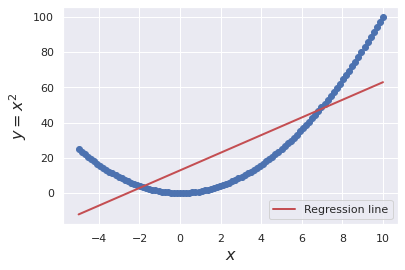

                            OLS Regression Results                            
Dep. Variable:                  y_pow   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.48e-22
Time:                        20:51:12   Log-Likelihood:                -425.84
No. Observations:                 100   AIC:                             855.7
Df Residuals:                      98   BIC:                             860.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8788      1.990      6.470      0.0

In [ ]:
x = np.linspace(-5,10,100)
D0 = np.array([x, np.power(x,2)]).T
# print(D0)
D1 = pd.DataFrame(data=D0, columns=["x", "y_pow"])
# print(D1)

bad_regr = linear_model.LinearRegression()
bad_regr.fit(D1[["x"]],D1[["y_pow"]])
print(f'Coefficient = {bad_regr.coef_}')
print(f'Intercept = {bad_regr.intercept_}')
print(f'R^2 = {bad_regr.score(D1[["x"]],D1[["y_pow"]])}')
# Remember that typically we do not quantify the quality on the basis of the training set!

plt.scatter(D1[["x"]],D1[["y_pow"]])
plt.xlabel("$x$", fontsize=16)
plt.ylabel(r'$y = x^2$', fontsize=16)
pred = bad_regr.predict(D1[["x"]])
plt.plot(x,pred,'r',label="Regression line",linewidth=2)
plt.legend(loc=4)
plt.show()

import statsmodels.formula.api as smf

# StatsModel: to see the quality table
# A little different API
D0 = np.array([np.ones(x.size), x, np.power(x,2)]).T
D1 = pd.DataFrame(data=D0, columns=["const", "x", "y_pow"])
regression_bad = smf.ols(formula='y_pow ~ x', data = D1).fit()
print(regression_bad.summary(),"\n")

Polynomial regression:

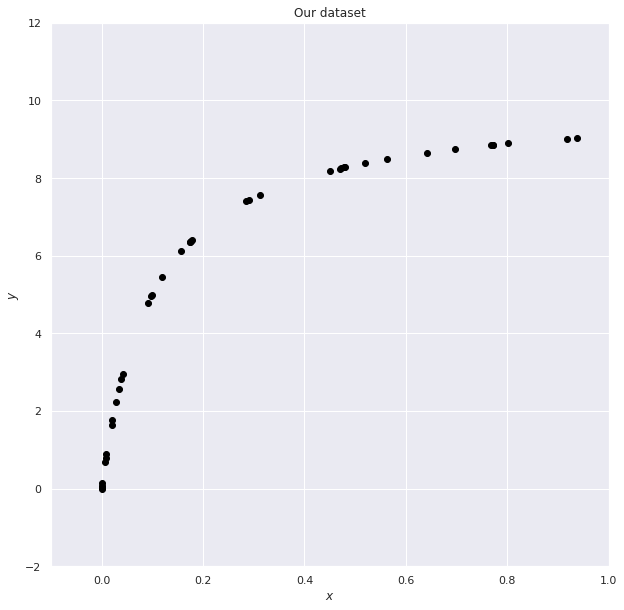

In [ ]:
#@markdown * Data generation
#@markdown * Data from function $y = 10 - \frac{1}{x^2 + \frac{1}{10}}$ (we will try to provide polynomial regression for it)
#@markdown * Obviously, in the typical case we just have date and do not know anything like that
#@markdown * Although $y=f(x)$ is not a polynomial in fact, we can effectively provide approximation for $y$ with multivariate regression

def make_data(N, err=1.0, rseed=1):     
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    # we add some noise
    if err > 0:                      
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40, err=0.0)

plt.figure(figsize=(10,10))
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Our dataset")
plt.show()

# Exercise number 3

For the generated synthetic data perform polynomial regression with `sklearn`:
1. You can just use `PolynomialFeatures` to generate higher powers.
2. Then, you can just provide linear regression on these new features.
3. Play with various polynomials, start with degree=3: $\hat{y} = \theta_3x^3 + \theta_2x^2 + \theta_1x + \theta_0$.
4. Remember that linear regression can just take a vector of values representing the dependent variable (and not only a single value as done before).
5. Visualize the results, divide data to train/test sets, find $\mathit{MSE}$, $\mathit{MAE}$, $R^2$. Show examples of underfitting and overfitting. Check also the cases when the data contain errors.
6. Show coefficients. What happens with them for larger powers? What does it mean?

In [ ]:
#@title Multivariate regression with real data

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
pprint.pprint(diabetes)

names = diabetes["feature_names"]
print(names)

{'DESCR': '.. _diabetes_dataset:\n'
          '\n'
          'Diabetes dataset\n'
          '----------------\n'
          '\n'
          'Ten baseline variables, age, sex, body mass index, average blood\n'
          'pressure, and six blood serum measurements were obtained for each '
          'of n =\n'
          '442 diabetes patients, as well as the response of interest, a\n'
          'quantitative measure of disease progression one year after '
          'baseline.\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '  :Number of Instances: 442\n'
          '\n'
          '  :Number of Attributes: First 10 columns are numeric predictive '
          'values\n'
          '\n'
          '  :Target: Column 11 is a quantitative measure of disease '
          'progression one year after baseline\n'
          '\n'
          '  :Attribute Information:\n'
          '      - age     age in years\n'
          '      - sex\n'
          '      - bmi     body

In [ ]:
#@markdown Some information on our data

df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
# target is supposed to present the disease progression (whatever it means here)
df['progress'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<Axes: >

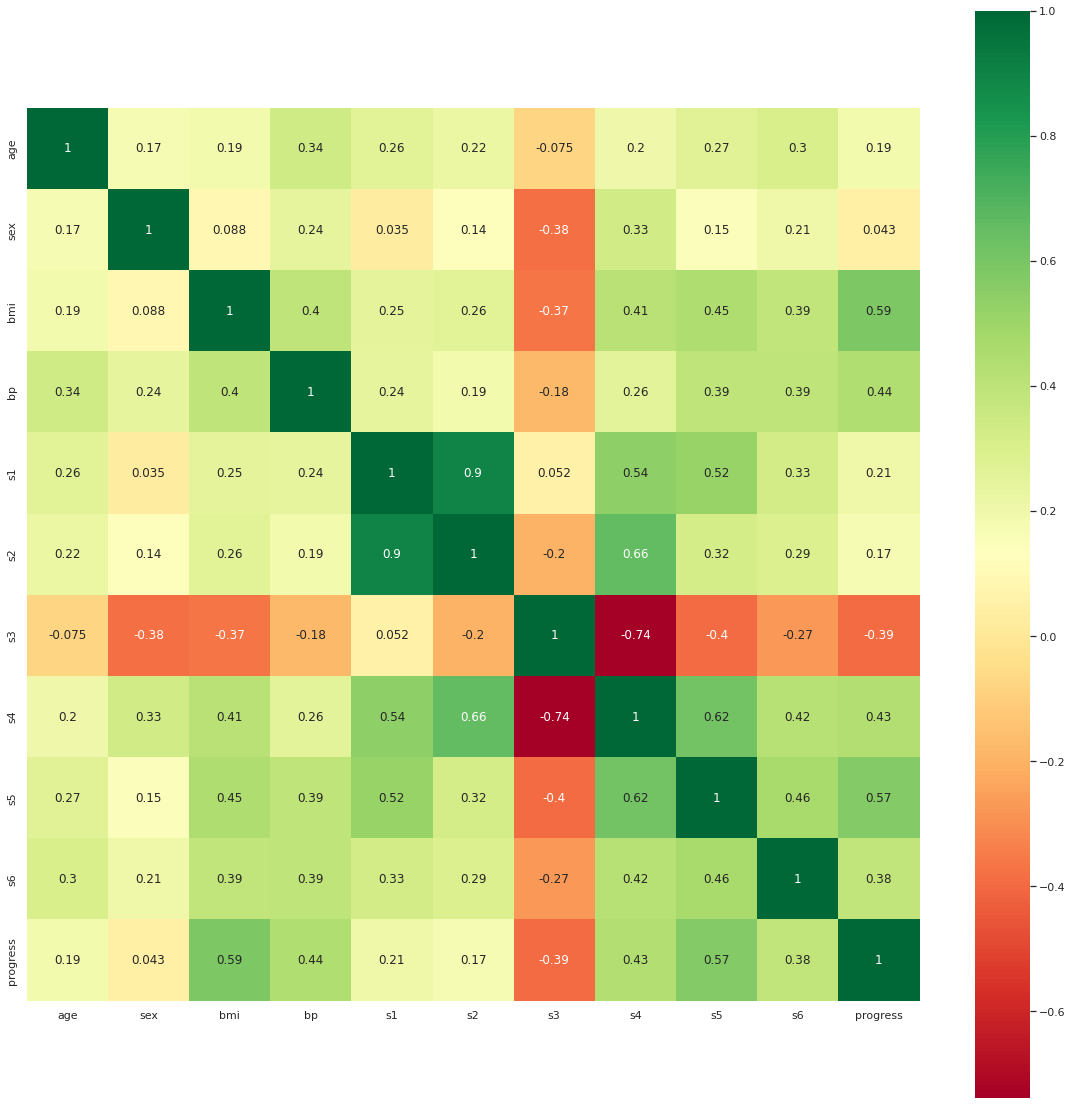

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, square=True, cmap='RdYlGn')

# Useful methods
## How to print column information

In [ ]:
mammals.columns

Index(['Mammal', 'body', 'brain'], dtype='object')

## How to print dimensions of the data

In [ ]:
mammals.shape

(62, 3)

## How to print number of rows

In [ ]:
len(mammals)

62

## How to print number of elements

In [ ]:
mammals.size

186

## How to print random samples

### By using iloc

In [ ]:
mammals.iloc[-3:,:]

,Mammal,body,brain
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5
61,Red fox,4.235,50.4


Accessing one element (by using scalar):

In [ ]:
mammals.iloc[0]

Mammal    Arctic fox
body           3.385
brain           44.5
Name: 0, dtype: object

Accessing more elements (by using list):

In [ ]:
mammals.iloc[[0,1]]

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5


Accessing more objects (by using slice notation):

In [ ]:
mammals.iloc[:3]

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1


Accessing some rows and some columns (by using slice notation):

In [ ]:
mammals.iloc[0:5, 0:2]

,Mammal,body
0,Arctic fox,3.385
1,Owl monkey,0.480
2,Mountain beaver,1.350
3,Cow,465.000
4,Grey wolf,36.330


Accessing last rows and last columns:

In [ ]:
mammals.iloc[-3:, -2:]

,body,brain
59,1.620,11.4
60,0.104,2.5
61,4.235,50.4


In [ ]:
mammals.iloc[-3:,:]

,Mammal,body,brain
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5
61,Red fox,4.235,50.4


### By using sample

In [ ]:
mammals.sample(3)

,Mammal,body,brain
0,Arctic fox,3.385,44.5
41,Okapi,250.000,490.0
14,Star-nosed mole,0.060,1.0


## How to check number of unique values in the column:

In [14]:
mammals.nunique()

Mammal    44
body      42
brain     41
dtype: int64

We can use that as a filter to indicate the column which have only 1 value:

In [15]:
mammals.columns[mammals.nunique() <= 1]

Index([], dtype='object')

## How to drop records

Using direct index:

In [ ]:
mammals_cut1 = mammals.drop(3)

Using condition:

In [ ]:
mammals_cut2 = mammals.drop(mammals[(mammals['body'] >= 48) | (mammals['brain'] >= 166)].index)

It can also be done in place, without the need of assignment:

In [ ]:
mammals.drop(mammals[(mammals['body'] >= 48) | (mammals['brain'] >= 166)].index, inplace=True)

Rows can also be dropped based on the presence of NA values:

In [ ]:
# Let's add some row with empty values
mammals.loc[62] = ["", np.NaN, 1]
print(mammals)

                       Mammal    body   brain
0                  Arctic fox   3.385   44.50
1                  Owl monkey   0.480   15.50
2             Mountain beaver   1.350    8.10
4                   Grey wolf  36.330  119.50
5                        Goat  27.660  115.00
6                    Roe deer  14.830   98.20
7                  Guinea pig   1.040    5.50
8                      Verbet   4.190   58.00
9                  Chinchilla   0.425    6.40
10            Ground squirrel   0.101    4.00
11     Arctic ground squirrel   0.920    5.70
12  African giant pouched rat   1.000    6.60
13  Lesser short-tailed shrew   0.005    0.14
14            Star-nosed mole   0.060    1.00
15      Nine-banded armadillo   3.500   10.80
16                 Tree hyrax   2.000   12.30
17               N.A. opossum   1.700    6.30
19              Big brown bat   0.023    0.30
22          European hedgehog   0.785    3.50
23               Patas monkey  10.000  115.00
24                        Cat   3.

In [ ]:
mammals.dropna(subset=['Mammal', 'body'], inplace=True)
print(mammals)

                       Mammal    body   brain
0                  Arctic fox   3.385   44.50
1                  Owl monkey   0.480   15.50
2             Mountain beaver   1.350    8.10
4                   Grey wolf  36.330  119.50
5                        Goat  27.660  115.00
6                    Roe deer  14.830   98.20
7                  Guinea pig   1.040    5.50
8                      Verbet   4.190   58.00
9                  Chinchilla   0.425    6.40
10            Ground squirrel   0.101    4.00
11     Arctic ground squirrel   0.920    5.70
12  African giant pouched rat   1.000    6.60
13  Lesser short-tailed shrew   0.005    0.14
14            Star-nosed mole   0.060    1.00
15      Nine-banded armadillo   3.500   10.80
16                 Tree hyrax   2.000   12.30
17               N.A. opossum   1.700    6.30
19              Big brown bat   0.023    0.30
22          European hedgehog   0.785    3.50
23               Patas monkey  10.000  115.00
24                        Cat   3.

## How to increase number of dimensions in the array

In [ ]:
array = np.array([8, 3, 5, 6])
print(array)
array.shape

[8 3 5 6]


(4,)

In [ ]:
array1 = array[np.newaxis, :]
print(array1)
array1.shape

[[8 3 5 6]]


(1, 4)

In [ ]:
array2 = array[:, np.newaxis]
print(array2)
array2.shape

[[8]
 [3]
 [5]
 [6]]


(4, 1)

# Links useful in this notebook

*   [What is quartile?](https://www.investopedia.com/terms/q/quartile.asp)
*   [Min-max and z-score normalization](https://www.codecademy.com/article/normalization)

